<a href="https://colab.research.google.com/github/kimmingyeol31/2024-1-my-BDA/blob/main/inclass/Week05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 파이썬 설치확인

In [1]:
import site
site.getsitepackages()

['/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/lib/python3.10/dist-packages']

In [3]:
import sys
import pandas as pd
import numpy as np

print(sys.version)
print(pd.__version__)
print(np.__version__)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
1.5.3
1.25.2


# 코랩에서 한글처리

In [4]:
!pip install koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 21.5 MB/s eta 0:00:00


In [5]:
# 데이터프레임의 소수점 이하 n(2)자리 출력
pd.set_option('display.precision', 2)

In [6]:
%config InlineBackend.figure_format = 'retina'

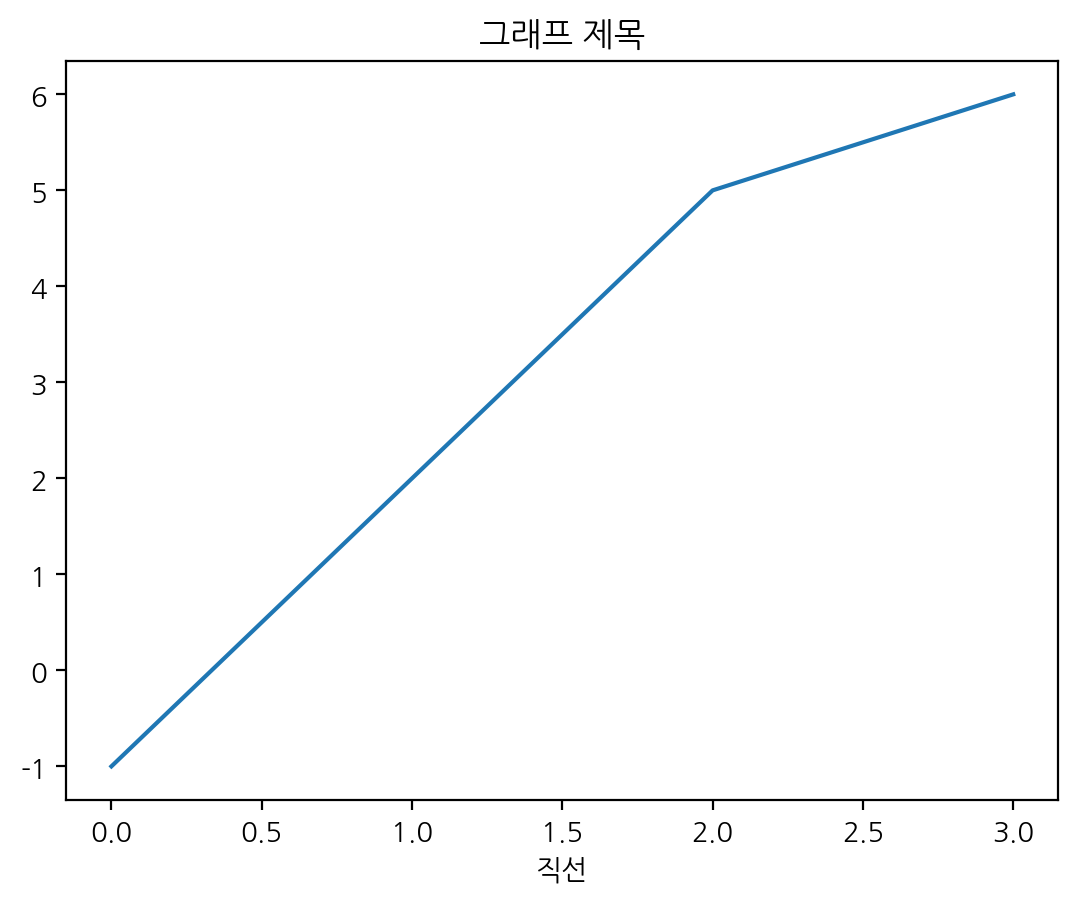

In [7]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

plt.plot([-1, 2, 5, 6])
plt.title('그래프 제목')
plt.xlabel("직선")
plt.show()

# 수업에서 사용할 데이터를 다음 깃에서 복사
- https://github.com/ai7dnn/data.git

## 수업에서 파일 사용 시
- 현재 하부 폴더: data
- 파일: data/파일 이름

In [8]:
!git clone https://github.com/ai7dnn/data.git

Cloning into 'data'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 24 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (24/24), 4.00 MiB | 6.66 MiB/s, done.


In [9]:
import pandas as pd

exam = pd.read_csv("data/exam.csv")
exam.sample(frac=.2)

,id,nclass,math,english,science
6,7,2,80,90,45
3,4,1,30,98,58
13,14,4,48,87,12
7,8,2,90,78,25


In [11]:
exam.agg('mean')

id         10.50
nclass      3.00
math       57.45
english    84.90
science    59.45
dtype: float64

In [14]:
exam.agg(['mean', 'median'])

,id,nclass,math,english,science
mean,10.5,3.0,57.45,84.9,59.45
median,10.5,3.0,54.00,86.5,62.50


In [18]:
# math 평균 구하기
exam.agg(mean_math = ('math', 'mean'))

,math
mean_math,57.45


In [20]:
import numpy as np
df = pd.DataFrame([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    [np.nan, np.nan, 10],
],
                  columns=['A', 'B', 'C'])

df

,A,B,C
0,1.0,2.0,3
1,4.0,5.0,6
2,7.0,8.0,9
3,NaN,NaN,10


In [21]:
df.agg(['sum', 'mean', 'median', 'min', 'max', 'count'], axis=0) # 시험 예상

,A,B,C
sum,12.0,15.0,28.0
mean,4.0,5.0,7.0
median,4.0,5.0,7.5
min,1.0,2.0,3.0
max,7.0,8.0,10.0
count,3.0,3.0,4.0


In [22]:
df.agg(['sum', 'mean', 'median', 'min', 'max', 'count'], axis=1) # 시험 예상

,sum,mean,median,min,max,count
0,6.0,2.0,2.0,1.0,3.0,3.0
1,15.0,5.0,5.0,4.0,6.0,3.0
2,24.0,8.0,8.0,7.0,9.0,3.0
3,10.0,10.0,10.0,10.0,10.0,1.0


In [23]:
df.agg({'A': ['sum', 'min'], 'B': ['min', 'max']})

,A,B
sum,12.0,NaN
min,1.0,2.0
max,NaN,8.0


In [26]:
df.agg(x=('A', 'max'), y=('B', 'min'), z=('C', 'mean')) # 인자 행명 = ("열명", "")

,A,B,C
x,7.0,NaN,NaN
y,NaN,2.0,NaN
z,NaN,NaN,7.0


In [30]:
df

,A,B,C
0,1.0,2.0,3
1,4.0,5.0,6
2,7.0,8.0,9
3,NaN,NaN,10


In [27]:
df.agg("mean")

A    4.0
B    5.0
C    7.0
dtype: float64

In [28]:
df.agg("mean", axis=0)

A    4.0
B    5.0
C    7.0
dtype: float64

In [29]:
df.agg("mean", axis="index")

A    4.0
B    5.0
C    7.0
dtype: float64

In [31]:
df.agg("mean", axis=1)

0     2.0
1     5.0
2     8.0
3    10.0
dtype: float64

In [32]:
df.agg("mean", axis="columns")

0     2.0
1     5.0
2     8.0
3    10.0
dtype: float64

In [33]:
df.agg(["sum", "mean"], axis="columns")

,sum,mean
0,6.0,2.0
1,15.0,5.0
2,24.0,8.0
3,10.0,10.0


In [35]:
df.agg(["sum", "mean"], axis="index")

,A,B,C
sum,12.0,15.0,28.0
mean,4.0,5.0,7.0


## 집단별 요약 통계량 구하기

In [36]:
exam.head()

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


In [43]:
exam.groupby('nclass').agg(['min', 'max', 'mean'])

id           math            english            science           
       min max  mean  min max   mean     min max   mean     min max   mean
nclass                                                                    
1        1   4   2.5   30  60  46.25      86  98  94.75      50  78  61.50
2        5   8   6.5   25  90  61.25      78  90  84.25      25  98  58.25
3        9  12  10.5   20  65  45.00      65  98  86.50      15  65  39.25
4       13  16  14.5   46  75  56.75      56  98  84.75      12  78  55.00
5       17  20  18.5   65  89  78.00      68  83  74.25      58  98  83.25

In [48]:
exam.groupby('nclass').agg(['mean', 'min', 'max'])[['math', 'english', 'science']]

math         english         science        
         mean min max    mean min max    mean min max
nclass                                               
1       46.25  30  60   94.75  86  98   61.50  50  78
2       61.25  25  90   84.25  78  90   58.25  25  98
3       45.00  20  65   86.50  65  98   39.25  15  65
4       56.75  46  75   84.75  56  98   55.00  12  78
5       78.00  65  89   74.25  68  83   83.25  58  98

In [49]:
exam.groupby('nclass').agg(mean_math = ('math', 'mean'))

,mean_math
nclass,
1,46.25
2,61.25
3,45.00
4,56.75
5,78.00


In [51]:
# 인자 사용 방법: 사전 형식
# { '열명': '함수명' }

exam.groupby('nclass').agg({'math': "mean"})

,math
nclass,
1,46.25
2,61.25
3,45.00
4,56.75
5,78.00


In [52]:
# { '열명': ['함수명1', '함수명2', ...]}
exam.groupby('nclass').agg({ 'math': ['mean', 'min', 'max']})

math        
         mean min max
nclass               
1       46.25  30  60
2       61.25  25  90
3       45.00  20  65
4       56.75  46  75
5       78.00  65  89